<a href="https://colab.research.google.com/github/Shrutikute09/musicplayer/blob/main/music_player.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/emotion')

In [ ]:
!python retrain.py --output_graph=retrained_graph.pb --output_labels=retrained_labels.txt --architecture=MobileNet_1.0_224 --image_dir=images

Streaming output truncated to the last 5000 lines.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sad/im377.png_MobileNet_1.0_224.txt
I1125 15:34:56.385360 140706490365824 retrain.py:363] Creating bottleneck at /tmp/bottleneck/sad/im377.png_MobileNet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sad/im296.png_MobileNet_1.0_224.txt
I1125 15:34:56.841205 140706490365824 retrain.py:363] Creating bottleneck at /tmp/bottleneck/sad/im296.png_MobileNet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sad/im985.png_MobileNet_1.0_224.txt
I1125 15:34:57.451251 140706490365824 retrain.py:363] Creating bottleneck at /tmp/bottleneck/sad/im985.png_MobileNet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sad/im319.png_MobileNet_1.0_224.txt
I1125 15:34:57.982218 140706490365824 retrain.py:363] Creating bottleneck at /tmp/bottleneck/sad/im319.png_MobileNet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sad/im810.png_

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


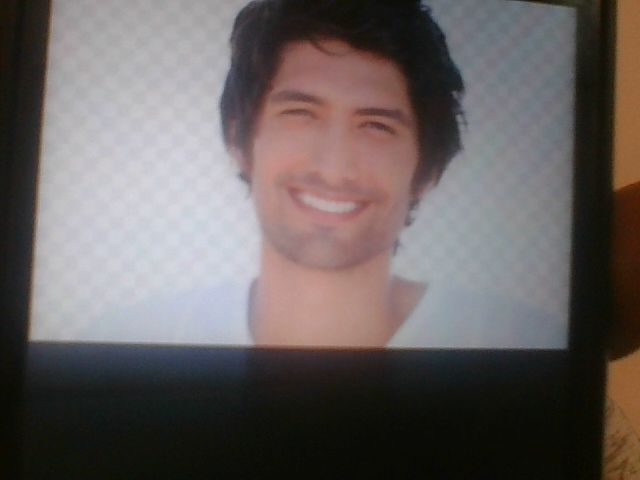

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# **EMOTION RECOGNITION**

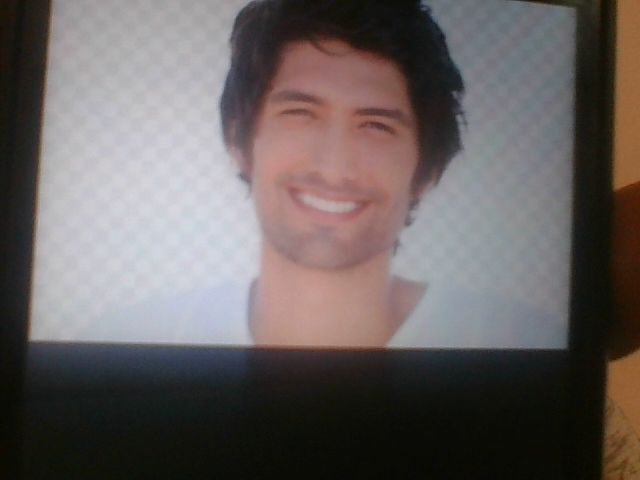

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display

# The program we will be finding faces on the example below
pil_im = Image.open('photo.jpg')
display(pil_im)

In [ ]:
!pip3 install face_recognition

     |████████████████████████████████| 100.1 MB 20 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=6c7573d199c1a8128d659022cff64fdfad8a2baad8e5dde7484dcd9e596650ef
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
!pip install fer

     |████████████████████████████████| 810 kB 12.4 MB/s 
     |████████████████████████████████| 2.3 MB 63.4 MB/s 


('happy', 1.0)


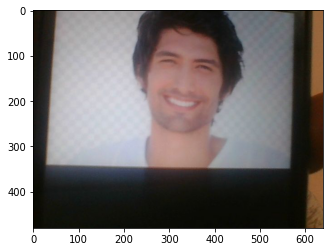

In [ ]:
import IPython.display as ipd
import numpy as np
from fer import FER
import matplotlib.pyplot as plt 
img = plt.imread("photo.jpg")
detector = FER()
result=detector.top_emotion(img)
print(result)
plt.imshow(img)
import cv2
bounding_box = result[0]
emotions = result[0]
emotions=emotions+".mp3"
ipd.Audio(filename='/content/drive/My Drive/emotion/songs/{}'.format(emotions),autoplay=True)